In [1]:
# Suppress depreciation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

# Add the path to the parent directory to augment search for pytreefile module
sys.path.append('../')
from pytreefile import parse_treefiles as ptf

### Read segment level data from forest treefile

In [2]:
segment_df = ptf.treeinfo_attributes_segment('example_data/raycloud_trees_info.txt')
segment_df

,tree_id,x,y,z,radius,parent_id,section_id,volume,diameter,length,strength,min_strength,dominance,angle,children
1,1,38.6994,-61.7109,-1.575960,0.038493,0.0,87.0,0.002176,0.076986,9.59191,0.015237,0.015237,0.0,0.0,1.0
2,1,38.7080,-61.7157,-1.361900,0.038493,1.0,174.0,0.000997,0.076986,9.12445,0.016018,0.015237,0.0,0.0,1.0
3,1,38.6999,-61.7100,-1.147040,0.038493,2.0,335.0,0.001001,0.076986,8.91016,0.016403,0.015237,0.0,0.0,1.0
4,1,38.7023,-61.7303,-0.955507,0.038493,3.0,467.0,0.000897,0.076986,8.69507,0.016809,0.015237,0.0,0.0,1.0
5,1,38.6910,-61.7279,-0.763498,0.038493,4.0,606.0,0.000895,0.076986,8.50245,0.017190,0.015237,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,86,48.8840,-43.1571,-1.708170,0.006699,41.0,7939.0,0.000004,0.013398,1.21122,0.032513,0.017243,0.0,0.0,1.0
22068,86,48.8557,-43.1619,-1.706680,0.006699,42.0,8235.0,0.000004,0.013398,1.18475,0.033239,0.017243,0.0,0.0,1.0
22069,86,48.8388,-43.2043,-1.668410,0.006689,43.0,8539.0,0.000008,0.013378,1.15601,0.034027,0.017243,0.0,0.0,1.0
22070,86,48.7790,-43.2070,-1.678130,0.006483,44.0,8846.0,0.000008,0.012967,1.09644,0.035046,0.017243,0.0,0.0,1.0


### Plot the mean volume by height with bins of 1 meter for the forest

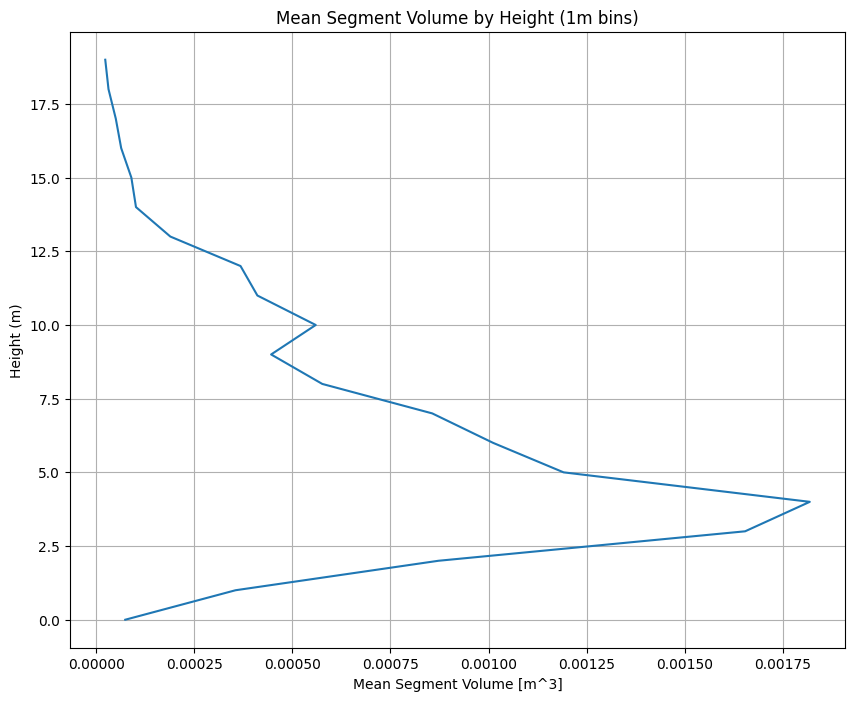

In [3]:
# Normalize 'z' values to start from 0
segment_df.loc[:, 'z_normalized'] = segment_df['z'] - segment_df['z'].min()

# Round the normalized 'z' values to the nearest meter
segment_df.loc[:, 'z_rounded'] = np.round(segment_df['z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_volume_by_height = segment_df.groupby('z_rounded')['volume'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_volume_by_height.values, mean_volume_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Segment Volume [m^3]')
plt.title('Mean Segment Volume by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()


### Plot the mean segment volume by height with bins of 1 meter for a single tree

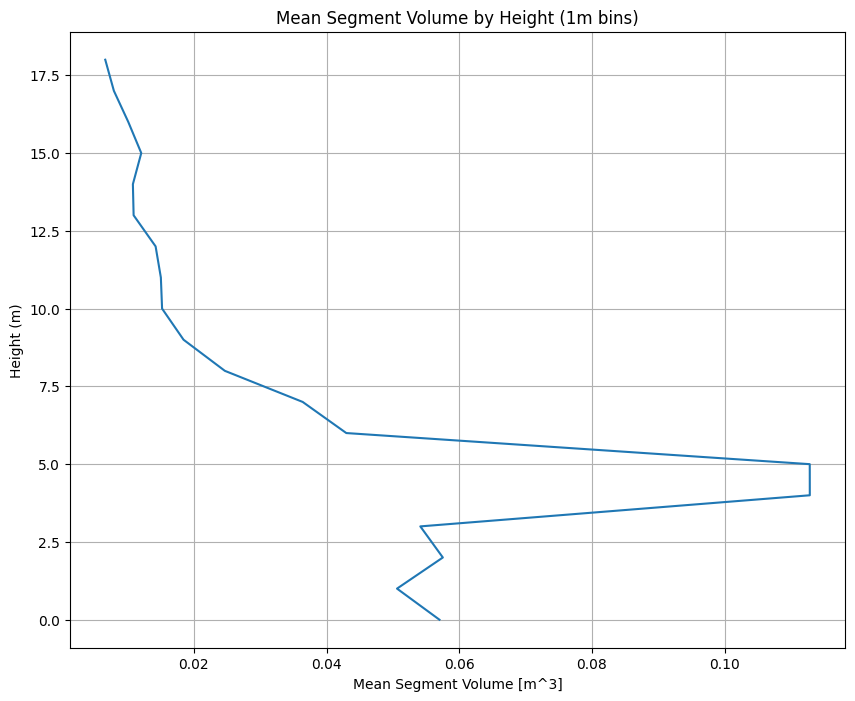

In [4]:
# Select a single tree from the segment dataframe
segment_df_single = segment_df.loc[segment_df['tree_id'] == 22]

# Normalize 'z' values to start from 0
segment_df_single.loc[:, 'z_normalized'] = segment_df_single['z'] - segment_df_single['z'].min()

# Round the normalized 'z' values to the nearest meter
segment_df_single.loc[:, 'z_rounded'] = np.round(segment_df_single['z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_volume_by_height = segment_df_single.groupby('z_rounded')['radius'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_volume_by_height.values, mean_volume_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Segment Volume [m^3]')
plt.title('Mean Segment Volume by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()


### Read in tree level data from forest treefile

In [5]:
tree_df = ptf.treeinfo_attributes_tree('example_data/raycloud_trees_info.txt')
tree_df

,tree_id,height,crown_radius,dimension,monocotal,DBH,bend,branch_slope
0,1,8.19910,0.60945,1.372790,0.514423,0.076986,0.008085,1.031810
1,2,9.89800,1.28990,1.303530,0.576129,0.071055,0.007163,0.896524
2,3,2.85950,0.51510,0.000000,0.000000,0.066182,0.028812,0.501056
3,4,4.48045,0.37865,1.002350,0.759317,0.072536,0.007002,0.875555
4,5,18.60220,7.00425,1.718130,0.390366,0.208286,0.026788,0.806005
...,...,...,...,...,...,...,...,...
82,83,2.58710,0.17240,1.341980,0.367468,0.064561,0.012963,1.483380
83,84,6.95837,0.77415,0.782092,0.762133,0.049896,0.016630,1.231680
84,85,0.63630,0.65380,0.000000,0.000000,0.000000,0.140457,0.841817
85,86,0.76517,0.70720,0.000000,0.000000,0.000000,0.095156,0.000000


### Plot crown radius by DBH for trees with DBH over 10cm

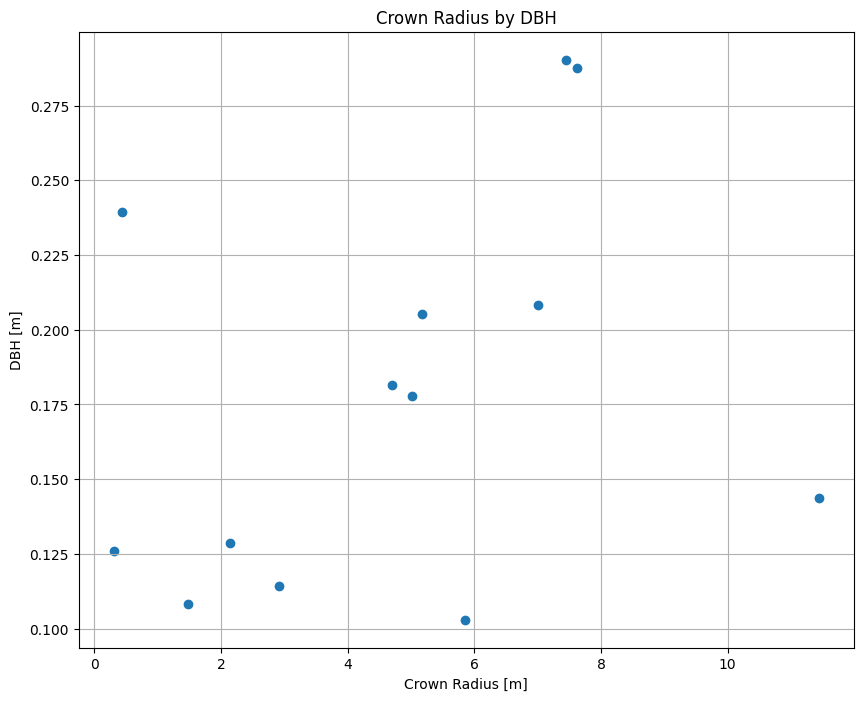

In [6]:
# Get DBH over 10cm
tree_df_filtered = tree_df[tree_df['DBH'] > 0.1]

# Set figure size
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(tree_df_filtered['crown_radius'], tree_df_filtered['DBH'])

# Add grid lines
plt.grid(True)

# Add labels and title
plt.xlabel('Crown Radius [m]')
plt.ylabel('DBH [m]')
plt.title('Crown Radius by DBH')

# Show the plot
plt.show()